In [31]:
import numpy as np
import matplotlib.pyplot as plt
from general_functions import *
from numba import jit, njit
from numba.types import float64, int64

In [2]:
def run_to_equilibrium(N, S, M, lambd, n_steps=10_000_000, show=False, eq=True, get_phi=False, thresh_frac=0.99):

    phi_initial = np.ones((N, S, M)) / S
    mu_pos, mu_neg = lambd, -lambd
    phi = phi_initial.copy()

    timesteps, I_list = [], []

    for i in range(n_steps):

        intend = choose_meaning(M)
        speaker, listener = choose_agents(N)
        signal = choose_signal(S, prob_array=phi[speaker,:,intend])
        infer = infer_meaning(M, prob_array=phi[listener,signal,:] / np.sum(phi[listener,signal,:]))

        # updating phi
        feedback = get_feedback(mu_pos, mu_neg, intend, infer, M)
        phi[speaker,signal,intend] += feedback * U(phi[speaker,signal,intend])
        phi[speaker,:,intend] /= np.sum(phi[speaker,:,intend])

        if i % 250 == 0 and i > 0:

            I = intelligibility(phi, N, S, M)

            print(f'timestep {i} -- I = {I:.2f}', end='\r')

            timesteps.append(i)
            I_list.append(I)

            if eq:
                if equilibrium(phi, N, S, M, I=I, thresh_frac=thresh_frac): 
                    if show:
                        fig, ax = plt.subplots()
                        ax.matshow(phi[0,:,:], cmap='inferno', vmin=0, vmax=phi.max())
                        ax.set_xlabel('M'); ax.set_ylabel('S')
                        ax.set_title(f'$(N,S,M,\lambda) = ({N},{S},{M},{lambd})$')
                    break

    phi_final = phi

    if show==True:
    
        fig, ax = plt.subplots(tight_layout=True, figsize=(5,6))
        ax.plot(timesteps, I_list, 'k')
        ax.set_xlabel('timesteps (conversations)')
        ax.set_ylabel('intelligibility (A)')

        fig, ax = plt.subplots(tight_layout=True)
        ax.imshow(phi_final[0], cmap='magma', vmin=0, vmax=1)
        ax.axis('off')
            
        plt.show()
    
    else: 
        if get_phi: return phi_initial, phi_final
        else:       return timesteps, I_list 

In [21]:
def initial_and_final_states_gridlines(phi_initial, phi_final):

    fig, ax = plt.subplots()
    ax.imshow(phi_initial[0], cmap='magma', vmin=0, vmax=1)
    ax.set_xticks(np.arange(0,4))
    ax.set_yticks(np.arange(0,4))
    ax.set_xticks(np.arange(0.5,3.5), minor=True)
    ax.set_yticks(np.arange(0.5,3.5), minor=True)
    ax.grid(True, which='minor', color='white', linewidth=1)
    ax.tick_params(which='major', bottom=False, left=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    fig, ax = plt.subplots()
    ax.imshow(phi_final[0], cmap='magma', vmin=0, vmax=1)
    ax.set_xticks(np.arange(0,4))
    ax.set_yticks(np.arange(0,4))
    ax.set_xticks(np.arange(0.5,3.5), minor=True)
    ax.set_yticks(np.arange(0.5,3.5), minor=True)
    ax.grid(True, which='minor', color='white', linewidth=1)
    ax.tick_params(which='major', bottom=False, left=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.show()

def show_phi_final(phi, N, S, M, fontsize, explicit_axes=False):

    fig, ax = plt.subplots(tight_layout=True, figsize=(5,5))
    ax.matshow(phi[0], cmap='magma', vmin=0, vmax=1)
    if not explicit_axes:
        ax.set_xlabel('M', fontsize=fontsize)
        ax.set_ylabel('S', fontsize=fontsize)

    if explicit_axes:
        M_labels = [f'$m_{i}$' for i in range(1, M+1)]
        S_labels = [f'$s_{i}$' for i in range(1, M+1)]
        M_ticks, S_ticks = range(M), range(S)
    else: M_labels, S_labels, M_ticks, S_ticks = [], [], [], []
    ax.set_yticks(S_ticks)
    ax.set_xticks(M_ticks)
    ax.set_yticklabels(S_labels, fontsize=fontsize)
    ax.set_xticklabels(M_labels, fontsize=fontsize)
    # ax.grid(visible=True)
    fig.savefig('/Users/casimirfisch/Desktop/Uni/MPhys/code/plots/miscellaneous/'+f'optimal_phi({S}{M}).png', dpi=400)
    plt.show()

def show_three_phi_final(phis, fontsize=12):

    fig, axs = plt.subplots(ncols=3, tight_layout=True, figsize=(5,8))
    for i, ax in enumerate(axs):
        ax.imshow(phis[i][0], cmap='magma', vmin=0, vmax=1)
        ax.set_xlabel('M', fontsize=fontsize)
        ax.set_ylabel('S', fontsize=fontsize)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
        ax.grid(visible=True)
    fig.savefig('/Users/casimirfisch/Desktop/Uni/MPhys/code/plots/miscellaneous/'+f'optimal_phis.png', dpi=400)
    plt.show()

In [22]:
N, lambd = 2, 0.1

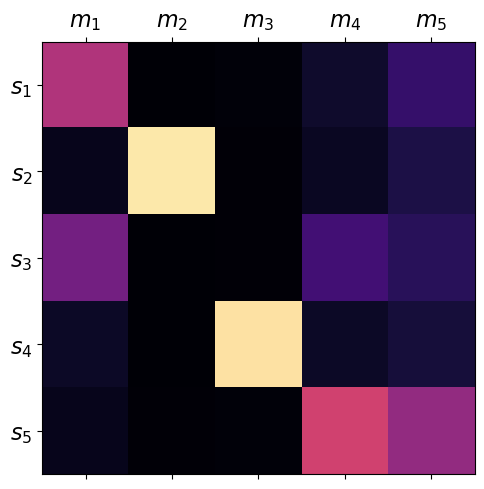

In [29]:
S, M = 5, 5
_, phi_final_sq = run_to_equilibrium(N, S, M, lambd, get_phi=True, thresh_frac=0.5)
show_phi_final(phi_final_sq, N, S, M, fontsize=16, explicit_axes=True)

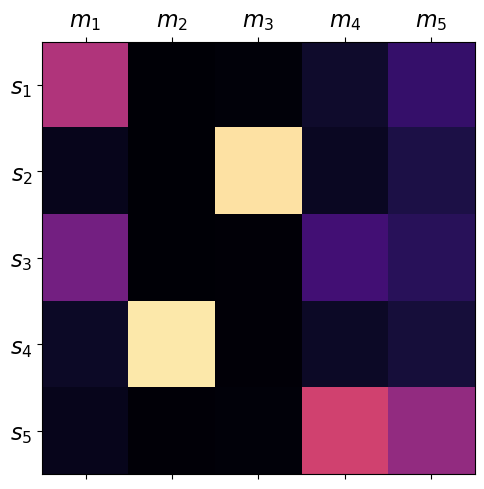

In [30]:
phi_original = phi_final_sq.copy()

phi_trial = phi_original.copy()

phi_trial[0, [1,1,3,3], [1,2,2,1]] = phi_trial[0, [3,3,1,1], [1,2,2,1]]

show_phi_final(phi_trial, N, S, M, fontsize=16, explicit_axes=True)

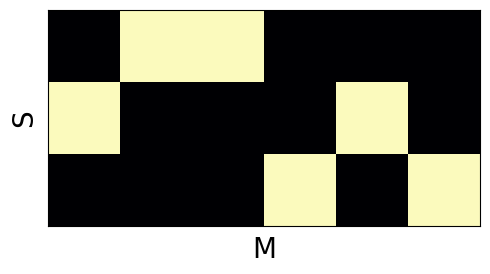

In [9]:
S, M = 3, 6
_, phi_final_hom = run_to_equilibrium(N, S, M, lambd, get_phi=True)
show_phi_final(phi_final_hom, N, S, M, fontsize=20)

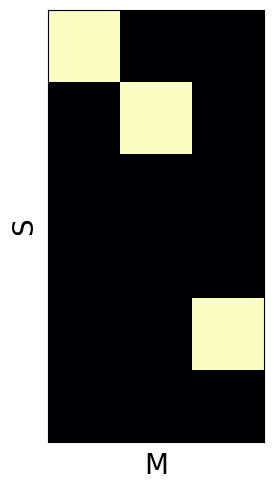

In [10]:
S, M = 6, 3
_, phi_final_syn = run_to_equilibrium(N, S, M, lambd, get_phi=True, thresh_frac=0.999)
show_phi_final(phi_final_syn, N, S, M, fontsize=20)

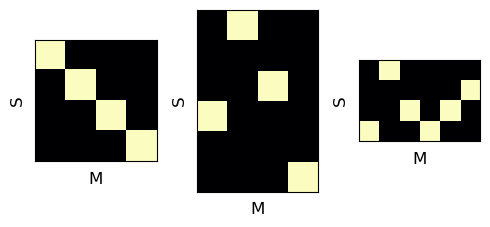

In [69]:
show_three_phi_final([phi_final_syn, phi_final_sq, phi_final_hom])

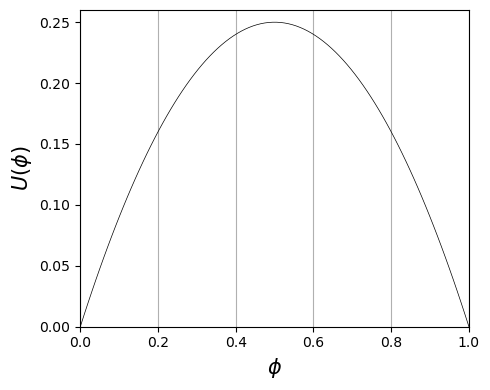

In [25]:
def show_U_phi(fontsize=15):

    fig, ax = plt.subplots(tight_layout=True, figsize=(5,4))
    phis = np.linspace(0, 1, 100)
    Us = U(phis)

    ax.plot(phis, Us, 'k', lw=.5)
    ax.set_xlabel(f'$\phi$', fontsize=fontsize)
    ax.set_ylabel(f'$U(\phi)$', fontsize=fontsize)
    ax.set_xlim([0,1])
    ax.set_ylim([0,0.26])
    ax.grid(True, axis='x')

    fig.savefig('/Users/casimirfisch/Desktop/Uni/MPhys/code/plots/miscellaneous/'+'U.png', dpi=400)

    plt.show()

show_U_phi()

In [11]:
# phi_initial, phi_final = run_to_equilibrium(N=2, S=4, M=4, lambd=0.1)
# fig, ax = plt.subplots()
# ax.imshow(phi_initial[0], cmap='magma', vmin=0, vmax=1)
# # ax.axis('off')
# ax.grid(color='w', linestyle='-', linewidth=1, which='minor')
# ax.set_xticklabels([])
# ax.set_yticklabels([])

# fig, ax = plt.subplots()
# im = ax.imshow(phi_final[0], cmap='magma', vmin=0, vmax=1)
# cbar = fig.colorbar(im, ax=ax)
# ax.axis('off')

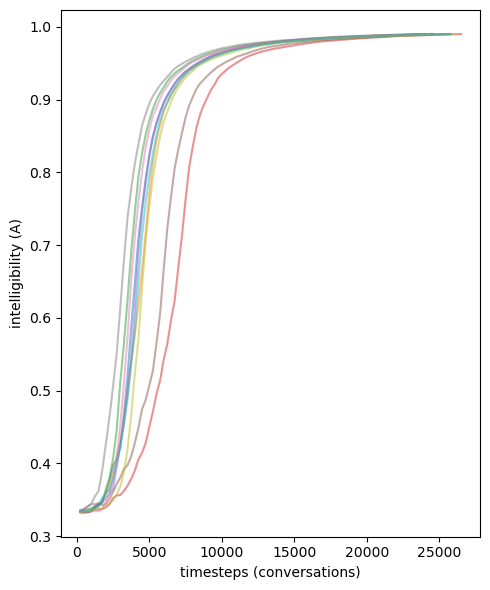

In [12]:
fig, ax = plt.subplots(tight_layout=True, figsize=(5,6))
ax.set_xlabel('timesteps (conversations)')
ax.set_ylabel('intelligibility (A)')
        
for i in range(10):

    print(f'run {i}', end='\r')
    timesteps, A_list = run_to_equilibrium(N=5, S=3, M=3, lambd=0.1)
    ax.plot(timesteps, A_list, alpha=0.5)

plt.show()

In [4]:
@njit
def rand_choice_numba(prob):
    return np.searchsorted(np.cumsum(prob), np.random.random(), side="right")

@njit
def intelligibility_numba(phi, N, S, M):

    I = 0
    for i in range(N):
        for j in range(N):
            if j == i: continue
            psi_j = np.divide(phi[j,:,:], np.expand_dims(phi[j,:,:].sum(axis=1), -1)) # [:, np.newaxis]
            for m in range(M):
                for s in range(S):
                    I += 1/(N * (N-1) * M) * phi[i, s, m] * psi_j[s, m]
    return I

@njit
def equilibrium_numba(phi, N, S, M, threshold=0.95, I=None, decision=False, decision_frac=0.3):

    I = I if I is not None else intelligibility_numba(phi, N, S, M) 
    if decision: return I > 1/M * (1 + decision_frac)
    else:
        if M >= S: return (I > threshold * (S/M))
        else: return (I > threshold)

@njit
def run_to_equilibrium_numba(N, S, M, lambd, n_steps=100000, n_runs=10, eq=True):

    timesteps, I_list = [], []

    # for run in range(n_runs):

    phi = np.ones((N, S, M)) / S # phi = 1/S for all speakers

    for step in range(n_steps):

        intend = np.random.randint(M) # meaning intended -- rho = 1/M, uniform distribution
        speaker = np.random.randint(N)
        listener = np.random.randint(N)
        while listener == speaker: listener = np.random.randint(N)
        produce = rand_choice_numba(prob = phi[speaker,:,intend])
        infer = rand_choice_numba(prob = phi[listener,produce,:] / np.sum(phi[listener,produce,:]))
        feedback = lambd if infer == intend else - lambd
        phi[speaker,produce,intend] += (feedback * phi[speaker,produce,intend] * (1 - phi[speaker,produce,intend]))
        phi[speaker,:,intend] /= np.sum(phi[speaker,:,intend])

        if step % 500 == 0 and step > 0:

            timesteps.append(step)
            I = intelligibility_numba(phi, N, S, M)
            I_list.append(I)

            if equilibrium_numba(phi, N, S, M, I=I) and eq: 
                break

    return timesteps, I_list

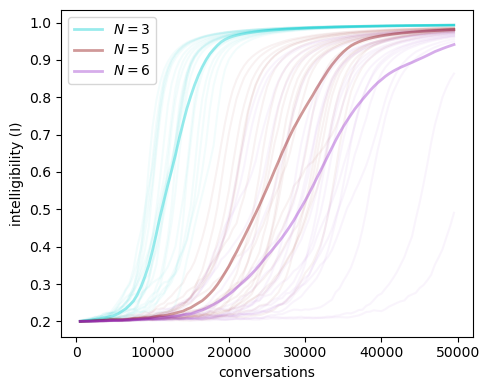

In [9]:
fig, ax = plt.subplots(tight_layout=True, figsize=(5,4))
ax.set_xlabel('conversations')
ax.set_ylabel('intelligibility (I)')

max_steps = 50000
S, M = 5, 5 
        
for N, color in zip([3,5,6], ['darkturquoise', 'darkred', 'darkorchid']):

    Is = []

    for i in range(20):

        timesteps, I_list = run_to_equilibrium_numba(N=N, S=S, M=M, lambd=0.1, n_steps=max_steps, eq=False)
        ax.plot(timesteps, I_list, alpha=0.05, color=color)
        Is.append(I_list)
    
    Is = np.array(Is)
    mean_I = np.mean(Is, axis=0)
    ax.plot(timesteps, mean_I, lw=2, color=color, alpha=0.4, label=f'$N = {N}$')

ax.legend()
fig.savefig('/Users/casimirfisch/Desktop/Uni/MPhys/code/plots/intelligibility/'+f'intelligibility{S}.{M}.png', dpi=400)
plt.show()

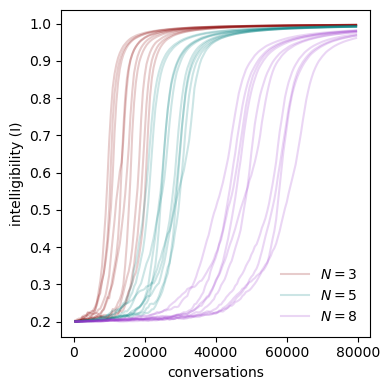

In [28]:
fig, ax = plt.subplots(tight_layout=True, figsize=(4,4))
ax.set_xlabel('conversations')
ax.set_ylabel('intelligibility (I)')

max_steps = 80000
S, M = 5, 5
        
for N, color in zip([3,5,8], ['darkred', 'teal', 'darkorchid']):

    for i in range(10):

        timesteps, I_list = run_to_equilibrium_numba(N=N, S=S, M=M, lambd=0.1, n_steps=max_steps, eq=False)
        if i == 0: ax.plot(timesteps, I_list, alpha=0.2, color=color, label=f'$N = {N}$')
        else:      ax.plot(timesteps, I_list, alpha=0.2, color=color)

ax.legend(frameon=False)
fig.savefig('/Users/casimirfisch/Desktop/Uni/MPhys/code/plots/intelligibility/'+f'intelligibility{S}.{M}.png', dpi=400)
plt.show()

KeyboardInterrupt: 

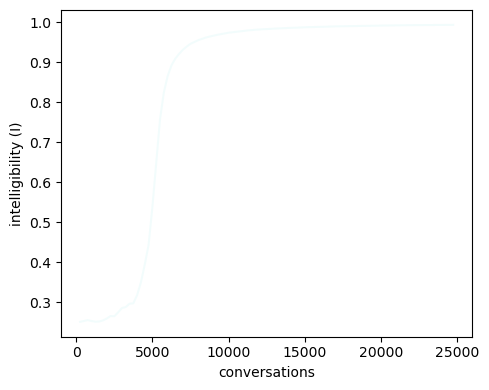

In [16]:
fig, ax = plt.subplots(tight_layout=True, figsize=(5,4))
ax.set_xlabel('conversations')
ax.set_ylabel('intelligibility (I)')

max_steps = 25000
N, lambd = 2, 0.1
        
for S, color in zip([4,5,6], ['darkturquoise', 'darkred', 'darkorchid']): #'darkorchid'

    Is = []

    for i in range(10):

        M = S
        timesteps, I_list = run_to_equilibrium(N=N, S=S, M=M, lambd=lambd, n_steps=max_steps, eq=False)
        ax.plot(timesteps, I_list, alpha=0.05, color=color)
        Is.append(I_list)
    
    Is = np.array(Is)
    mean_I = np.mean(Is, axis=0)
    ax.plot(timesteps, mean_I, lw=2, color=color, alpha=0.4, label=f'$(S,M) = ({S},{M})$')

    # deterministic result

    # phi_init = initiate_phi(N, S, M, method='hazy_diagonal', diag_val=1/S+1e-20)
    # t_eval, Is_determ = get_deterministic_prediction_intelligibility(N, S, M, lambd, tf=max_steps, eval_step=250, phi_initial=phi_init)

    # ax.plot(t_eval, Is_determ, lw=1, ls='dashed', color=color, alpha=0.4)

# ax.plot([],[],color='k',alpha=0.5,ls='dashed',label='deterministic\npredictions')

ax.legend(frameon=False)
fig.savefig('/Users/casimirfisch/Desktop/Uni/MPhys/code/plots/intelligibility/'+f'intelligibility{N}.{lambd}.png', dpi=400)
plt.show()

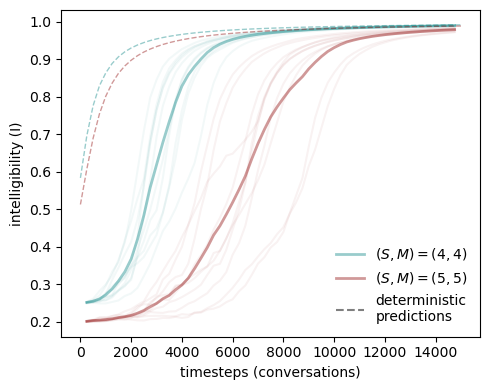

In [11]:
fig, ax = plt.subplots(tight_layout=True, figsize=(5,4))
ax.set_xlabel('timesteps (conversations)')
ax.set_ylabel('intelligibility (I)')

max_steps = 15000
N, lambd = 2, 0.1
        
for S, color in zip([4,5], ['teal', 'darkred']): #'darkorchid'

    Is = []

    for i in range(10):

        M = S
        timesteps, I_list = run_to_equilibrium(N=N, S=S, M=M, lambd=lambd, n_steps=max_steps, eq=False)
        ax.plot(timesteps, I_list, alpha=0.05, color=color)
        Is.append(I_list)
    
    Is = np.array(Is)
    mean_I = np.mean(Is, axis=0)
    ax.plot(timesteps, mean_I, lw=2, color=color, alpha=0.4, label=f'$(S,M) = ({S},{M})$')

    # deterministic result

    phi_init = initiate_phi(N, S, M, method='hazy_diagonal', diag_val=1/S+1e-20)
    t_eval, Is_determ = get_deterministic_prediction_intelligibility(N, S, M, lambd, tf=max_steps, eval_step=250, phi_initial=phi_init)

    ax.plot(t_eval, Is_determ, lw=1, ls='dashed', color=color, alpha=0.4)

ax.plot([],[],color='k',alpha=0.5,ls='dashed',label='deterministic\npredictions')

ax.legend(frameon=False)
fig.savefig('/Users/casimirfisch/Desktop/Uni/MPhys/code/plots/intelligibility/'+f'intelligibility_vs_deterministic{N}.{S}.{M}.png', dpi=400)
plt.show()